In [114]:
import io
from io import StringIO
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import os



In [115]:

def create_dataframe(history_dict):
    return pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in history_dict.items() ]))
# a_df = create_dataframe(accuracy_data)
# t_df = create_dataframe(train_loss)
# v_df = create_dataframe(val_loss)
# l_df = create_dataframe(learn_rate

In [116]:
def get_history_data(directory, data_key):
    history_data = {}
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r') as file:
                lst = []
                data = json.load(file)
                for v in data[data_key].values():
                    lst.append(v)
                history_data[data["Seed"]]=lst
    return history_data

In [117]:
def create_lineplit(dataframe, title, xlabel, ylabel, x_ticks=None, y_ticks=None):
    sns.set_theme(style="whitegrid")
    ax = sns.lineplot(data=dataframe).set(title=title, xlabel=xlabel, ylabel=ylabel)
    if x_ticks:
        ax.set_xticks(x_ticks)
    if y_ticks:
        ax.set_yticks(y_ticks)
    plt.show()


In [118]:
directory = "/Users/aarnes/Documents/GitHub/MA_Peter-R-ysland-Aarnes/Results/Training json stats/NorBERT"
directory2 = "/Users/aarnes/Documents/GitHub/MA_Peter-R-ysland-Aarnes/Results/Training json stats/Scandi-bert-something"

accuracy_data = get_history_data(directory, "Validation accuracy history")
train_loss = get_history_data(directory, "Train loss history")
val_loss = get_history_data(directory, "Val loss history")
learn_rate = get_history_data(directory, "Learn rate history")

scandi_accuracy_data = get_history_data(directory2, "Validation accuracy history")
scandi_train_loss = get_history_data(directory2, "Train loss history")
scandi_val_loss = get_history_data(directory2, "Val loss history")
scandi_learn_rate = get_history_data(directory2, "Learn rate history")




In [119]:
def load_json_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

In [120]:
def file_paths(directory):
    filepaths = []
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            file_path = os.path.join(directory, filename)
            filepaths.append(file_path)
    return filepaths

In [121]:
import os

def create_latex_table_from_json(data, file_path):
    # Extract the keys and their respective histories
    keys = ["Validation accuracy history", "Train loss history", "Val loss history", "Learn rate history"]
    histories = {key: data[key] for key in keys}

    # Determine the number of epochs (based on the length of validation accuracy history)
    num_epochs = len(data["Validation accuracy history"])

    # Define the LaTeX column names
    latex_column_names = ["Validation Recall", "Train Loss", "Validation Loss", "Learn rate"]

    # Extract the caption from the file path
    file_name = os.path.basename(file_path)
    model_name, seed_info = file_name.split("_seed_", 1)
    seed_number = seed_info.split(".")[0]
    caption = f"{model_name.replace('-', ' ').capitalize()} seed {seed_number}"

    # Start generating the LaTeX table
    latex_table = "\\begin{table}\n\\centering\n\\begin{tabular}{|c|" + "c|" * len(keys) + "}\n"
    latex_table += "\\hline\nEpoch & " + " & ".join(latex_column_names) + "\\\\\n\\hline\n"

    # Add rows to the LaTeX table
    for i in range(num_epochs):
        row = [
            f"{histories['Validation accuracy history'][f'epoch: {i}']:.4f}",
            f"{histories['Train loss history'][f'epoch: {i}']:.4f}",
            f"{histories['Val loss history'][f'epoch: {i}']:.4f}",
            f"{histories['Learn rate history'][f'epoch: {i}']:.2e}",
        ]
        latex_table += f"{i + 1} & " + " & ".join(row) + "\\\\\n\\hline\n"

    latex_table += f"\\end{{tabular}}\n\\caption{{{caption}}}\n\\label{{tab:{caption}}}\n\\end{{table}}"

    return latex_table


In [122]:
norbert_paths = file_paths("/Users/aarnes/Documents/GitHub/MA_Peter-R-ysland-Aarnes/Results/Training json stats/NorBERT")
ner_scandi_paths = file_paths("/Users/aarnes/Documents/GitHub/MA_Peter-R-ysland-Aarnes/Results/Training json stats/Scandi-bert-something")
norbert2_paths = file_paths("/Users/aarnes/Documents/GitHub/MA_Peter-R-ysland-Aarnes/Results/Training json stats/NorBERT2")
mbert_paths = file_paths("/Users/aarnes/Documents/GitHub/MA_Peter-R-ysland-Aarnes/Results/Training json stats/mBERT")
nb_bert_paths = file_paths("/Users/aarnes/Documents/GitHub/MA_Peter-R-ysland-Aarnes/Results/Training json stats/NB-BERT")

In [123]:
for path in norbert_paths:
    p = load_json_data(path)
    table = create_latex_table_from_json(p, path)
    print(table)
    print()

\begin{table}
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
Epoch & Validation Recall & Train Loss & Validation Loss & Learn rate\\
\hline
1 & 0.7125 & 97.1865 & 5.1887 & 2.00e-05\\
\hline
2 & 0.8110 & 27.5390 & 3.8597 & 2.00e-05\\
\hline
3 & 0.8389 & 16.6439 & 3.2529 & 2.00e-05\\
\hline
4 & 0.8333 & 10.9792 & 3.4119 & 1.86e-05\\
\hline
5 & 0.8554 & 7.6425 & 3.3456 & 1.86e-05\\
\hline
6 & 0.8358 & 5.4948 & 3.6588 & 1.86e-05\\
\hline
7 & 0.8384 & 3.9299 & 3.7279 & 1.86e-05\\
\hline
8 & 0.8500 & 3.1927 & 3.7611 & 1.73e-05\\
\hline
9 & 0.8510 & 2.5959 & 3.8057 & 1.73e-05\\
\hline
10 & 0.8503 & 1.9686 & 4.1348 & 1.61e-05\\
\hline
11 & 0.8423 & 1.6832 & 4.4392 & 1.61e-05\\
\hline
12 & 0.8576 & 1.3368 & 4.2600 & 1.50e-05\\
\hline
13 & 0.8476 & 1.1130 & 4.6264 & 1.50e-05\\
\hline
14 & 0.8469 & 1.0656 & 4.6346 & 1.39e-05\\
\hline
15 & 0.8520 & 0.9986 & 4.4718 & 1.39e-05\\
\hline
16 & 0.8508 & 0.8883 & 4.4089 & 1.29e-05\\
\hline
17 & 0.8568 & 0.7255 & 4.7918 & 1.29e-05\\
\hline
18 & 0.8527 & 0

In [124]:
for path in ner_scandi_paths:
    p = load_json_data(path)
    table = create_latex_table_from_json(p, path)
    print(table)
    print()

\begin{table}
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
Epoch & Validation Recall & Train Loss & Validation Loss & Learn rate\\
\hline
1 & 0.9031 & 38.1994 & 2.0490 & 2.00e-05\\
\hline
2 & 0.9033 & 8.8223 & 1.7134 & 2.00e-05\\
\hline
3 & 0.9227 & 5.3342 & 1.6697 & 2.00e-05\\
\hline
4 & 0.9193 & 3.4882 & 1.7666 & 1.86e-05\\
\hline
5 & 0.9055 & 2.4416 & 2.2019 & 1.86e-05\\
\hline
6 & 0.9118 & 1.8235 & 2.2214 & 1.73e-05\\
\hline
7 & 0.9230 & 1.4112 & 2.0177 & 1.73e-05\\
\hline
8 & 0.9251 & 1.3939 & 2.0775 & 1.61e-05\\
\hline
9 & 0.9125 & 1.1165 & 2.4483 & 1.61e-05\\
\hline
10 & 0.9210 & 0.9270 & 2.5080 & 1.50e-05\\
\hline
11 & 0.9201 & 0.7225 & 2.3101 & 1.50e-05\\
\hline
12 & 0.9152 & 0.6342 & 2.5197 & 1.39e-05\\
\hline
13 & 0.9169 & 0.7638 & 2.6066 & 1.39e-05\\
\hline
14 & 0.9159 & 0.6130 & 2.6678 & 1.29e-05\\
\hline
15 & 0.9220 & 0.4806 & 2.6560 & 1.29e-05\\
\hline
16 & 0.9113 & 0.4423 & 2.9390 & 1.20e-05\\
\hline
17 & 0.9089 & 0.5022 & 2.7538 & 1.20e-05\\
\hline
\end{tabular}
\cap

In [125]:
for path in norbert2_paths:
    p = load_json_data(path)
    table = create_latex_table_from_json(p, path)
    print(table)
    print()

\begin{table}
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
Epoch & Validation Recall & Train Loss & Validation Loss & Learn rate\\
\hline
1 & 0.8377 & 52.2142 & 2.8407 & 2.00e-05\\
\hline
2 & 0.8622 & 12.3361 & 2.4389 & 2.00e-05\\
\hline
3 & 0.8631 & 6.2733 & 2.7640 & 2.00e-05\\
\hline
4 & 0.8714 & 3.4814 & 2.9224 & 2.00e-05\\
\hline
5 & 0.8651 & 2.2019 & 3.4047 & 1.86e-05\\
\hline
6 & 0.8663 & 1.5534 & 3.4323 & 1.86e-05\\
\hline
7 & 0.8651 & 1.0808 & 3.7757 & 1.73e-05\\
\hline
8 & 0.8762 & 0.8991 & 3.6880 & 1.73e-05\\
\hline
9 & 0.8653 & 0.8292 & 3.8373 & 1.61e-05\\
\hline
10 & 0.8772 & 0.7939 & 3.7952 & 1.61e-05\\
\hline
11 & 0.8728 & 0.5443 & 3.8610 & 1.50e-05\\
\hline
12 & 0.8590 & 0.4789 & 4.1652 & 1.50e-05\\
\hline
13 & 0.8672 & 0.3228 & 4.3434 & 1.39e-05\\
\hline
14 & 0.8709 & 0.2740 & 4.4650 & 1.39e-05\\
\hline
15 & 0.8716 & 0.2703 & 4.3906 & 1.29e-05\\
\hline
16 & 0.8568 & 0.3783 & 4.5439 & 1.29e-05\\
\hline
17 & 0.8554 & 0.2802 & 5.0246 & 1.20e-05\\
\hline
18 & 0.8590 & 0.2

In [126]:
for path in mbert_paths:
    p = load_json_data(path)
    table = create_latex_table_from_json(p, path)
    print(table)
    print()

\begin{table}
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
Epoch & Validation Recall & Train Loss & Validation Loss & Learn rate\\
\hline
1 & 0.7914 & 68.5052 & 3.9147 & 2.00e-05\\
\hline
2 & 0.8234 & 22.3259 & 3.5576 & 2.00e-05\\
\hline
3 & 0.8239 & 13.9207 & 3.6928 & 2.00e-05\\
\hline
4 & 0.8350 & 9.2733 & 3.6146 & 2.00e-05\\
\hline
5 & 0.8539 & 6.8918 & 3.5897 & 2.00e-05\\
\hline
6 & 0.8401 & 5.3763 & 4.0479 & 1.86e-05\\
\hline
7 & 0.8433 & 3.9361 & 4.1711 & 1.86e-05\\
\hline
8 & 0.8440 & 3.2099 & 4.6394 & 1.73e-05\\
\hline
9 & 0.8389 & 2.9028 & 4.6286 & 1.73e-05\\
\hline
10 & 0.8530 & 2.0669 & 4.4494 & 1.61e-05\\
\hline
11 & 0.8375 & 1.8255 & 4.9256 & 1.61e-05\\
\hline
12 & 0.8442 & 1.5254 & 5.1655 & 1.50e-05\\
\hline
13 & 0.8387 & 1.4220 & 5.1197 & 1.50e-05\\
\hline
14 & 0.8479 & 1.4381 & 5.1185 & 1.39e-05\\
\hline
\end{tabular}
\caption{Mbert seed 1024}
\label{tab:Mbert seed 1024}
\end{table}

\begin{table}
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
Epoch & Validation Recal

In [127]:
for path in nb_bert_paths:
    p = load_json_data(path)
    table = create_latex_table_from_json(p, path)
    print(table)
    print()

\begin{table}
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
Epoch & Validation Recall & Train Loss & Validation Loss & Learn rate\\
\hline
1 & 0.8464 & 52.0772 & 2.6354 & 2.00e-05\\
\hline
2 & 0.8682 & 13.0837 & 2.3323 & 2.00e-05\\
\hline
3 & 0.8857 & 7.2475 & 2.3209 & 2.00e-05\\
\hline
4 & 0.8781 & 4.8451 & 2.6476 & 2.00e-05\\
\hline
5 & 0.8898 & 3.4069 & 2.6461 & 1.86e-05\\
\hline
6 & 0.8997 & 2.4228 & 2.6254 & 1.86e-05\\
\hline
7 & 0.8883 & 1.7802 & 3.0084 & 1.73e-05\\
\hline
8 & 0.8912 & 1.5040 & 3.0689 & 1.73e-05\\
\hline
9 & 0.8883 & 1.2387 & 3.2360 & 1.61e-05\\
\hline
10 & 0.8910 & 0.9481 & 3.0965 & 1.61e-05\\
\hline
11 & 0.8874 & 0.7708 & 3.4764 & 1.61e-05\\
\hline
12 & 0.8852 & 0.8753 & 3.3880 & 1.50e-05\\
\hline
13 & 0.8706 & 0.6192 & 3.9092 & 1.50e-05\\
\hline
14 & 0.8939 & 0.7180 & 3.4948 & 1.39e-05\\
\hline
15 & 0.8750 & 0.5822 & 3.9152 & 1.39e-05\\
\hline
\end{tabular}
\caption{Nb bert seed 37}
\label{tab:Nb bert seed 37}
\end{table}

\begin{table}
\centering
\begin{tabu

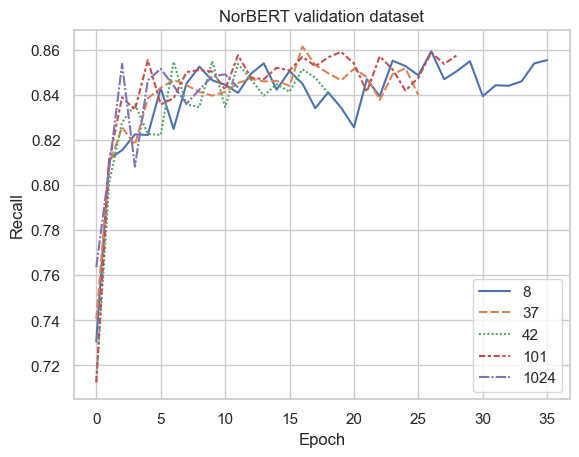

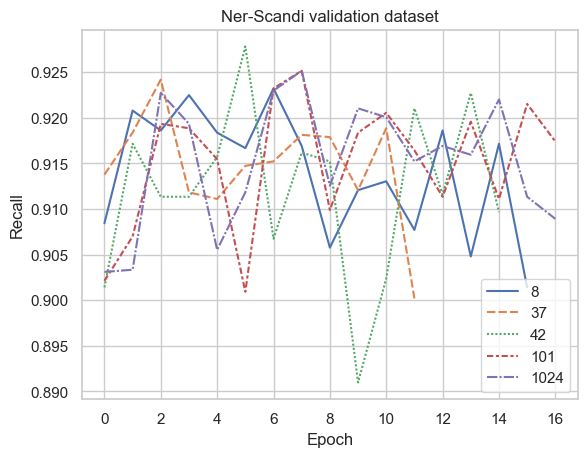

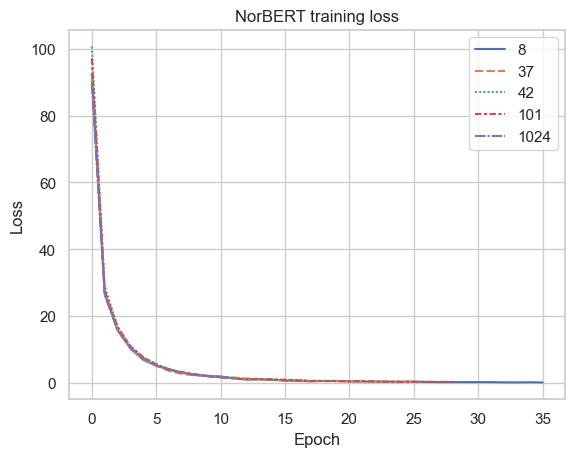

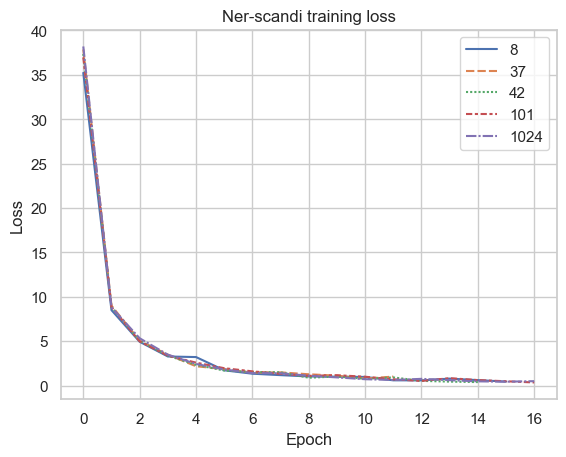

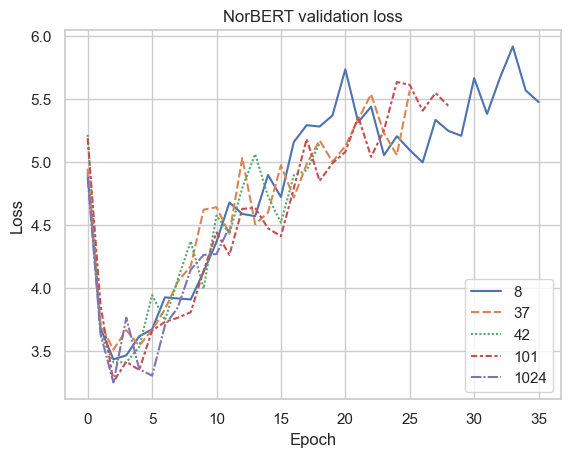

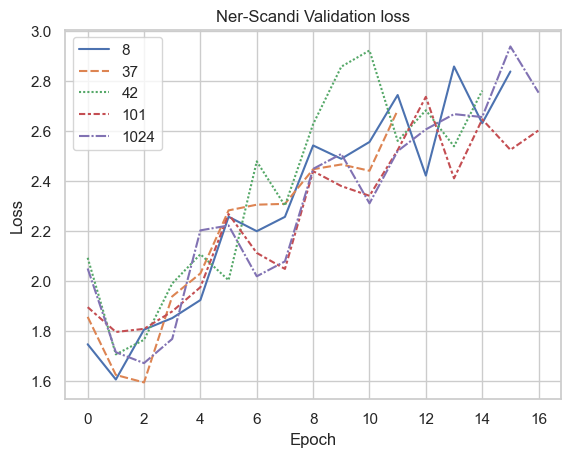

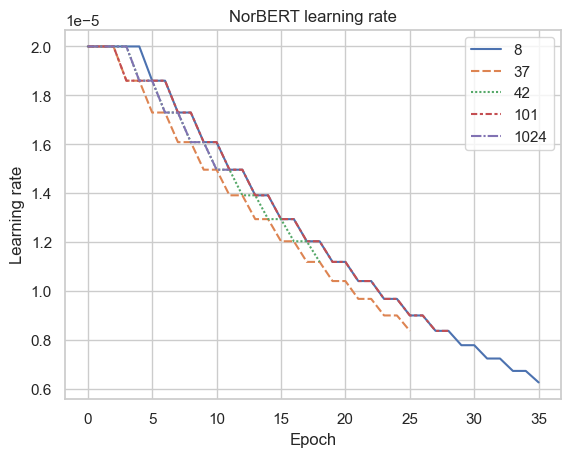

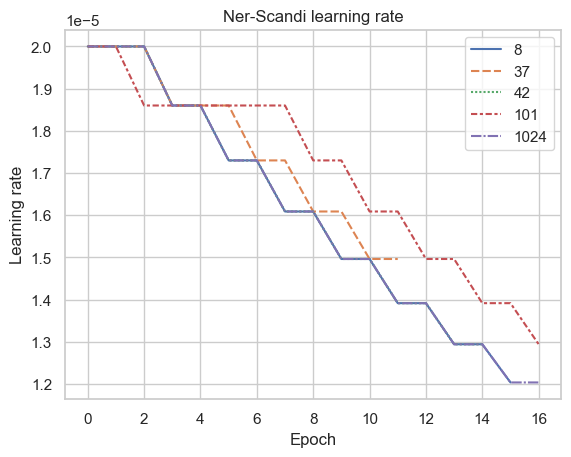

In [128]:
create_lineplit(accuracy_data, "NorBERT validation dataset", "Epoch", "Recall")
create_lineplit(scandi_accuracy_data, "Ner-Scandi validation dataset", "Epoch", "Recall")


create_lineplit(train_loss, "NorBERT training loss", "Epoch", "Loss")
create_lineplit(scandi_train_loss, "Ner-scandi training loss", "Epoch", "Loss")


create_lineplit(val_loss, "NorBERT validation loss", "Epoch", "Loss")
create_lineplit(scandi_val_loss, "Ner-Scandi Validation loss", "Epoch", "Loss")


create_lineplit(learn_rate, "NorBERT learning rate", "Epoch", "Learning rate")
create_lineplit(scandi_learn_rate, "Ner-Scandi learning rate", "Epoch", "Learning rate")


In [129]:

df1 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in accuracy_data.items() ]))


In [130]:
x = 2
x_ticks = [x*2 for x in range(20)]

[Text(0.5, 0, 'number of epochs'), Text(0, 0.5, 'validation accuracy')]

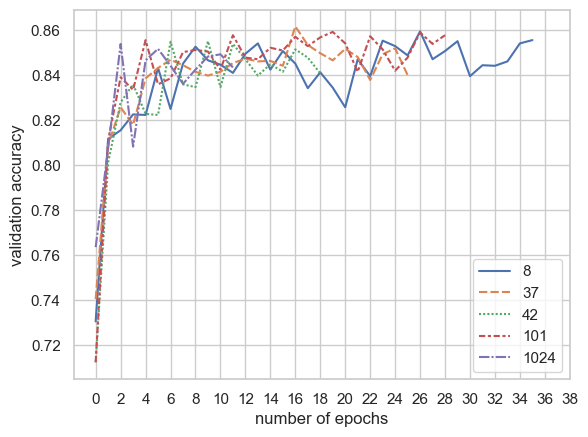

In [131]:
sns.set_theme(style="whitegrid")
ax = sns.lineplot(data=df1)
ax.set_xticks(x_ticks)

ax.set(xlabel='number of epochs', ylabel='validation accuracy')